# EV cars in Washington State - from the following web site (9/20/2024) - https://catalog.data.gov/dataset/electric-vehicle-population-data

## Exploratory Data Analysis (EDA) of dataset

In [1]:
## Import Pandas and the data set
## data set has been cleaned and updated with columns added for vehicle range, battery kilowatt hour, and if car has
## DC fast charging capability

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\v-joecamp\OneDrive - Microsoft\Desktop\Python Beginner Projects\EV stats\Electric_Vehicle_Population_Data_09292024.csv')

df.head()

,VIN (1-10),County,City,State,COUNTYFP,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Kwh battery,kW fast DC charging,Legislative District,Vehicle Location,Electric Utility
0,JTMAB3FV3P,Kitsap,Seabeck,WA,35.0,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,40300.0,18.1,3.3,35.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,35.0,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,29990.0,40.0,50.0,35.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC
2,5YJ3E1EA4L,King,Seattle,WA,33.0,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,39990.0,54.0,250.0,43.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,1N4AZ0CP8E,King,Seattle,WA,33.0,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,28980.0,24.0,50.0,46.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,1G1FX6S00H,Thurston,Yelm,WA,67.0,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,36620.0,60.0,55.0,20.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC


In [2]:
#view of data frame column names, count, and data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204968 entries, 0 to 204967
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         204967 non-null  object 
 1   County                                             204967 non-null  object 
 2   City                                               204967 non-null  object 
 3   State                                              204967 non-null  object 
 4   COUNTYFP                                           204967 non-null  float64
 5   Postal Code                                        204967 non-null  float64
 6   Model Year                                         204967 non-null  float64
 7   Make                                               204967 non-null  object 
 8   Model                                              204967 non-null  object

In [3]:
#statistical view of the dataframe. I rounded decimals to three places. Values for MSRP and KwH Battery sizes are of
#interest

df.describe().round(3)

,COUNTYFP,Postal Code,Model Year,Electric Range,Base MSRP,Kwh battery,kW fast DC charging,Legislative District
count,204967.000,204967.000,204967.000,204967.000,204967.000,204073.000,204074.000,204967.000
mean,39.847,98264.520,2020.963,212.104,49205.234,58.011,143.764,28.971
std,16.322,306.557,2.985,113.346,18540.725,29.262,103.771,14.910
min,1.000,98001.000,2002.000,6.000,23845.000,4.000,0.000,1.000
25%,33.000,98052.000,2019.000,97.000,37495.000,27.000,50.000,17.000
50%,33.000,98125.000,2022.000,252.000,46990.000,60.000,150.000,33.000
75%,53.000,98373.000,2023.000,314.000,55000.000,82.000,250.000,42.000
max,77.000,99403.000,2025.000,410.000,845000.000,200.000,350.000,49.000


In [4]:
#a list of the differnet makes and total count
#total of 43 car brands for EVs (battery electric and Plug In hybrids)

unique_make = df['Make'].unique()
print(unique_make)
print("Total number of car makers:", len(unique_make))

['TOYOTA' 'NISSAN' 'TESLA' 'CHEVROLET' 'HYUNDAI' 'RIVIAN' 'FORD' 'KIA'
 'AUDI' 'DODGE' 'BMW' 'VOLKSWAGEN' 'MITSUBISHI' 'VOLVO' 'FIAT' 'MAZDA'
 'MINI' 'LINCOLN' 'MERCEDES-BENZ' 'PORSCHE' 'JAGUAR' 'LEXUS' 'JEEP'
 'CHRYSLER' 'HONDA' 'GENESIS' 'POLESTAR' 'SUBARU' 'CADILLAC' 'SMART'
 'FISKER' 'LUCID' 'ACURA' 'GMC' 'ALFA ROMEO' 'LAND ROVER' 'TH!NK'
 'BENTLEY' 'AZURE DYNAMICS' 'WHEEGO ELECTRIC CARS' 'ROLLS-ROYCE' 'RAM' nan]
Total number of car makers: 43


In [5]:
#get a count of the number for each model for the entire dataset
make_counts = df['Make'].value_counts()

make_df = make_counts.reset_index()
make_df.columns = ['Make', 'Count']
make_df.head(10)

,Make,Count
0,TESLA,90091
1,CHEVROLET,15083
2,NISSAN,14513
3,FORD,10799
4,KIA,9094
5,BMW,8465
6,TOYOTA,7920
7,HYUNDAI,5773
8,RIVIAN,5666
9,VOLKSWAGEN,5624


In [6]:
#get count by county for the entire dataset 

county_counts = df['County'].value_counts()

county_df = county_counts.reset_index()
county_df.columns = ['County', 'Count']
county_df.head(10)


,County,Count
0,King,105230
1,Snohomish,24716
2,Pierce,16189
3,Clark,12225
4,Thurston,7525
5,Kitsap,6848
6,Spokane,5460
7,Whatcom,4975
8,Benton,2545
9,Skagit,2265


In [7]:
#for visibility a list of the electric companies that service each county. I don't have annual capacity number for each 
# utility company but do have electricity plant generation information for the state. Will add in READ ME and maybe later in this 
#this notebook

utility_details = df.groupby('County')['Electric Utility'].unique().reset_index()
                             
utility_details.columns = ['County', 'Electric Utility']

utility_details

,County,Electric Utility
0,Adams,[BONNEVILLE POWER ADMINISTRATION||AVISTA CORP|...
1,Asotin,[BONNEVILLE POWER ADMINISTRATION||AVISTA CORP|...
2,Benton,[BONNEVILLE POWER ADMINISTRATION||CITY OF RICH...
3,Chelan,[PUD NO 1 OF CHELAN COUNTY]
4,Clallam,[BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ...
5,Clark,[BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ...
6,Columbia,"[PACIFICORP, BONNEVILLE POWER ADMINISTRATION||..."
7,Cowlitz,[BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ...
8,Douglas,"[PUD NO 1 OF DOUGLAS COUNTY, BONNEVILLE POWER ..."
9,Ferry,[BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ...


In [48]:
#Example of pulling utility companies for a specific county.define the names of the utility companies that service 
## a specific county This could be used for additional analysis. 
specific_county = 'King'

countyu_df = df[df['County'] ==specific_county]

utility_companies_in_county = countyu_df['Electric Utility'].unique()

print(utility_companies_in_county)

['CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)'
 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)' 'CITY OF TACOMA - (WA)'
 'CITY OF TACOMA - (WA)||TANNER ELECTRIC COOP' 'CITY OF SEATTLE - (WA)'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)'
 'PUGET SOUND ENERGY INC'
 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY'
 'NO KNOWN ELECTRIC UTILITY SERVICE']


In [8]:
#get count of EV and Plug in hybrids. This will information will be brokendown by Battery Electric Vehicle (BEV) and 
#Plug In Hybrid Electric Vehicle (PHEV)

evtype_counts = df['Electric Vehicle Type'].value_counts()

evtype_df = evtype_counts.reset_index()
evtype_df.columns = ['Electric Vehicle Type', 'Count']
print(evtype_df)

                    Electric Vehicle Type   Count
0          Battery Electric Vehicle (BEV)  161197
1  Plug-in Hybrid Electric Vehicle (PHEV)   43770


## Breakdown of Battery EV population

In [9]:
bev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
bev_df.head()

,VIN (1-10),County,City,State,COUNTYFP,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Kwh battery,kW fast DC charging,Legislative District,Vehicle Location,Electric Utility
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,35.0,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,29990.0,40.0,50.0,35.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC
2,5YJ3E1EA4L,King,Seattle,WA,33.0,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,39990.0,54.0,250.0,43.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,1N4AZ0CP8E,King,Seattle,WA,33.0,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,28980.0,24.0,50.0,46.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,1G1FX6S00H,Thurston,Yelm,WA,67.0,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,36620.0,60.0,55.0,20.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,61.0,98036.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,316.0,49990.0,75.0,250.0,21.0,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC


In [10]:
# BEV count by county
bev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161197 entries, 1 to 204966
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         161197 non-null  object 
 1   County                                             161197 non-null  object 
 2   City                                               161197 non-null  object 
 3   State                                              161197 non-null  object 
 4   COUNTYFP                                           161197 non-null  float64
 5   Postal Code                                        161197 non-null  float64
 6   Model Year                                         161197 non-null  float64
 7   Make                                               161197 non-null  object 
 8   Model                                              161197 non-null  object 
 9 

In [11]:
bev_df.describe().round(2)

,COUNTYFP,Postal Code,Model Year,Electric Range,Base MSRP,Kwh battery,kW fast DC charging,Legislative District
count,161197.00,161197.00,161197.00,161197.00,161197.00,161197.00,161197.00,161197.00
mean,39.85,98249.69,2021.20,261.29,50150.27,69.41,180.80,29.47
std,16.06,297.05,2.78,70.31,19328.50,21.39,83.55,14.96
min,1.00,98001.00,2002.00,56.00,23845.00,16.00,0.00,1.00
25%,33.00,98042.00,2020.00,230.00,37495.00,54.00,120.00,18.00
50%,33.00,98118.00,2022.00,266.00,46990.00,75.00,200.00,34.00
75%,53.00,98366.00,2023.00,328.00,58900.00,82.00,250.00,43.00
max,77.00,99403.00,2025.00,410.00,420000.00,200.00,350.00,49.00


In [12]:
#a list of BEVs by model year for Washington State 

bev_yearly_counts_df = bev_df['Model Year'].value_counts().reset_index()
bev_yearly_counts_df.columns = ['Model Year', 'Count']
bev_yearly_counts_df['Model Year'] = bev_yearly_counts_df['Model Year'].astype(int)
bev_yearly_counts_df = bev_yearly_counts_df.sort_values(by='Model Year', ascending=True)

#calculate the year to year percentage increase
bev_yearly_counts_df['Percentage Change'] = bev_yearly_counts_df['Count'].pct_change().round(3)*100

bev_yearly_counts_df = bev_yearly_counts_df.sort_values(by = 'Model Year', ascending=False)
bev_yearly_counts_df.head(20)

,Model Year,Count,Percentage Change
14,2025,163,-99.3
2,2024,22175,-57.7
0,2023,52421,119.1
1,2022,23922,52.2
3,2021,15718,51.5
4,2020,10378,17.6
6,2019,8826,-11.6
5,2018,9984,118.9
7,2017,4560,22.8
8,2016,3714,7.5


ValueError: cannot convert float NaN to integer

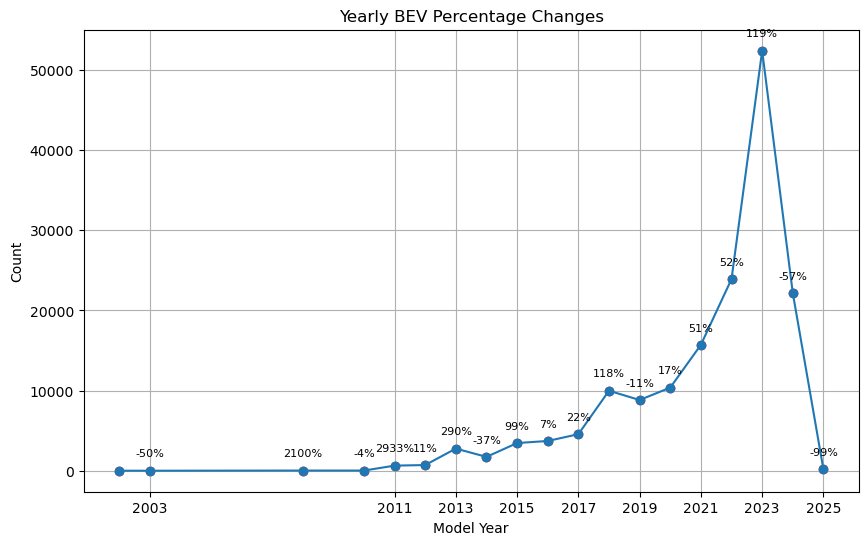

In [15]:
#graph the list of BEVs by model year for Washington State and include percentage change year to year. I should have dropped
# 2002 as this has a NaN value

import matplotlib.pyplot as plt

#plotting the a line graph
plt.figure(figsize=(10, 6))
plt.plot(bev_yearly_counts_df['Model Year'], bev_yearly_counts_df['Count'], marker= 'o')
plt.title('Yearly BEV Percentage Changes')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(True)

#showing odd years
odd_years = bev_yearly_counts_df['Model Year'][bev_yearly_counts_df['Model Year']%2 != 0]
plt.xticks(odd_years)

#adding percentage change as points
for i, row in bev_yearly_counts_df.iterrows():
    plt.scatter(row['Model Year'], row['Count'], color='red')
    plt.annotate(f"{int(row['Percentage Change'])}%", (row['Model Year'], row['Count']),
             textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    

plt.legend()
plt.show()

In [16]:
##percentage increase in BEV cars from 2015 to 2025. Need to add all BEV from 2015 and older then compare to current total
## count. This highlights the percentage increase in 10 years. 


# Summing the counts for the years 2002 through 2015
sum_2002_2015 = bev_yearly_counts_df[(bev_yearly_counts_df['Model Year'] >= 2002) & (bev_yearly_counts_df['Model Year'] <= 2015)]['Count'].sum()

# Summing the counts for the entire dataset
total_sum = bev_yearly_counts_df['Count'].sum()


# Calculating the percentage increase
percentage_increase = ((total_sum - sum_2002_2015) / sum_2002_2015) * 100

# Display the results
print(f"Sum for years 2002-2015: {sum_2002_2015}")
print(f"Total sum: {total_sum}")
print(f"Percentage increase: {percentage_increase:.2f}%")



Sum for years 2002-2015: 9336
Total sum: 161197
Percentage increase: 1626.62%


In [17]:
##same as above but a shorter time window comparison - total BEVs thru 2020 to total/all up current count

# Summing the counts for the years 2002 through 2015
sum_2002_2020 = bev_yearly_counts_df[(bev_yearly_counts_df['Model Year'] >= 2002) & (bev_yearly_counts_df['Model Year'] <= 2020)]['Count'].sum()

# Summing the counts for the entire dataset
total_sum1 = bev_yearly_counts_df['Count'].sum()

sum_2021_2025 = (total_sum1 - sum_2002_2020)

# Calculating the percentage increase
percentage_increase1 = ((total_sum - sum_2002_2020) / sum_2002_2020) * 100

# Display the results
print(f"Sum for years 2002-2020: {sum_2002_2020}")
print(f"Sum for year 2021-2025: {sum_2021_2025}")
print(f"Total sum: {total_sum1}")
print(f"Percentage increase: {percentage_increase1:.2f}%")

Sum for years 2002-2020: 46798
Sum for year 2021-2025: 114399
Total sum: 161197
Percentage increase: 244.45%


In [18]:
#a list of the differnet makes and total count
#total of 34 car brands for EVs (battery electric)

bev_unique_make = bev_df['Make'].unique()
print(bev_unique_make)
print("Total number of car makers:", len(bev_unique_make))

['NISSAN' 'TESLA' 'CHEVROLET' 'RIVIAN' 'FORD' 'KIA' 'VOLKSWAGEN' 'VOLVO'
 'FIAT' 'BMW' 'MINI' 'PORSCHE' 'AUDI' 'JAGUAR' 'HYUNDAI' 'GENESIS'
 'MERCEDES-BENZ' 'POLESTAR' 'SUBARU' 'TOYOTA' 'CADILLAC' 'SMART' 'HONDA'
 'MAZDA' 'LEXUS' 'FISKER' 'LUCID' 'ACURA' 'MITSUBISHI' 'GMC' 'TH!NK'
 'AZURE DYNAMICS' 'ROLLS-ROYCE' 'RAM']
Total number of car makers: 34


In [19]:
#get a count of the number for each model for the BEV dataset
bev_make_counts = bev_df['Make'].value_counts()

bev_make_df = bev_make_counts.reset_index()
bev_make_df.columns = ['Make', 'Count']
bev_make_df.head(10)

,Make,Count
0,TESLA,90091
1,NISSAN,14513
2,CHEVROLET,10267
3,FORD,7100
4,KIA,6372
5,RIVIAN,5666
6,VOLKSWAGEN,5624
7,HYUNDAI,4897
8,BMW,3153
9,AUDI,2298


In [20]:
## create pivot table of all the car brands and count of model year sold. 
make_yearly_counts = bev_df.groupby(['Make','Model Year']).size().reset_index(name = 'Count')

pivot_table = make_yearly_counts.pivot(index='Make', columns = 'Model Year', values='Count')
pivot_table.fillna(0).head(38)

Model Year,2002.0,2003.0,2008.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0
Make,,,,,,,,,,,,,,,,,,,
ACURA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0
AUDI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,523.0,26.0,252.0,496.0,549.0,452.0,0.0
AZURE DYNAMICS,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,94.0,25.0,105.0,103.0,73.0,35.0,35.0,236.0,956.0,1320.0,40.0
CADILLAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,597.0,0.0
CHEVROLET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,103.0,85.0,1475.0,531.0,1100.0,1526.0,576.0,1054.0,3215.0,544.0,0.0
FIAT,0.0,0.0,0.0,0.0,0.0,0.0,105.0,89.0,228.0,136.0,152.0,55.0,15.0,0.0,0.0,0.0,0.0,19.0,0.0
FISKER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0
FORD,0.0,0.0,0.0,0.0,0.0,11.0,64.0,58.0,35.0,32.0,24.0,7.0,0.0,0.0,878.0,1528.0,4058.0,405.0,0.0


In [45]:
##Example of grouping by a specifc car make and count for each model year

tesla_df = df[df['Make'] == 'TESLA']
tesla_sales_per_year = tesla_df.groupby('Model Year').size().reset_index(name='Count')
print(tesla_sales_per_year)

    Model Year  Count
0       2008.0     22
1       2010.0     21
2       2011.0      6
3       2012.0    127
4       2013.0    725
5       2014.0    632
6       2015.0   1028
7       2016.0   1598
8       2017.0   1657
9       2018.0   7946
10      2019.0   4590
11      2020.0   7130
12      2021.0  11332
13      2022.0  13872
14      2023.0  28142
15      2024.0  11263


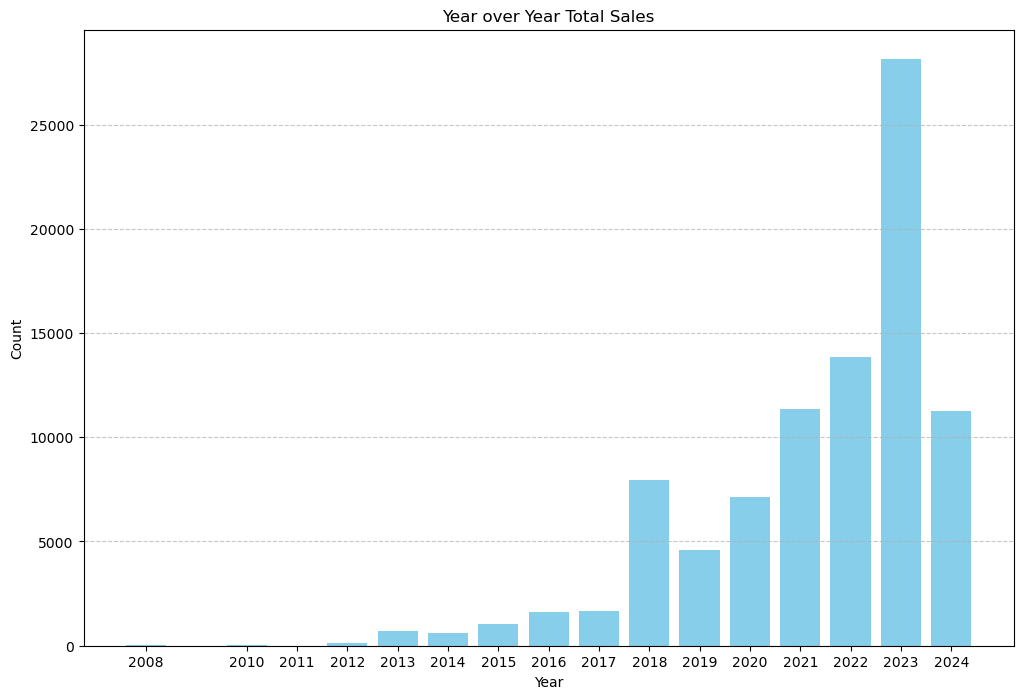

In [46]:
# Ensure 'Model Year' is of integer type
tesla_sales_per_year['Model Year'] = tesla_sales_per_year['Model Year'].astype(int)

#create a bar chart
plt.figure(figsize=(12,8))
plt.bar(tesla_sales_per_year['Model Year'], tesla_sales_per_year['Count'], color='skyblue')

plt.title('Year over Year Total Sales')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(tesla_sales_per_year['Model Year'])  # Ensure only integer years are used for x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Breakdown of Battery Electric Vehicles by county

In [21]:
#a list of the counties in Washington State and count of BEV cars in each

bev_county_counts = bev_df['County'].value_counts().reset_index()
bev_county_counts.columns = ['County', 'Count']
bev_county_counts.head(10)

,County,Count
0,King,85184
1,Snohomish,20537
2,Pierce,12466
3,Clark,9087
4,Thurston,5667
5,Kitsap,5117
6,Spokane,3765
7,Whatcom,3701
8,Benton,1791
9,Skagit,1698


In [22]:
## list of cities within King County and the count of BEV  in each

##filter for county
df_kingcnty = bev_df[bev_df['County'] == 'King'] 

##groupby city and count 
kingcnty_cities_counts = df_kingcnty['City'].value_counts().reset_index()
kingcnty_cities_counts.columns = ['City', 'Count']
kingcnty_cities_counts.head(10)

,City,Count
0,Seattle,26655
1,Bellevue,8840
2,Redmond,6388
3,Sammamish,5161
4,Kirkland,5055
5,Renton,4353
6,Kent,2751
7,Issaquah,2669
8,Mercer Island,2131
9,Woodinville,2031


In [23]:
## year over year percentage growth of BEV ownership by county

# Group by County, Model Year, and Electric Vehicle Type to count occurrences
grouped_data = bev_df.groupby(['County', 'Model Year']).size().reset_index(name='Count')

# Sort the data by County and Model Year to prepare for year-over-year percentage change calculation
grouped_data = grouped_data.sort_values(by=['County', 'Model Year'])

# Calculate the year-over-year percentage change in vehicle count
grouped_data['YOY Change (%)'] = grouped_data.groupby(['County'])['Count'].pct_change() * 100

# Display the results
grouped_data.head(10)
                


,County,Model Year,Count,YOY Change (%)
0,Adams,2011.0,1,NaN
1,Adams,2012.0,1,0.000000
2,Adams,2014.0,1,0.000000
3,Adams,2015.0,1,0.000000
4,Adams,2018.0,3,200.000000
5,Adams,2019.0,1,-66.666667
6,Adams,2020.0,4,300.000000
7,Adams,2021.0,5,25.000000
8,Adams,2022.0,7,40.000000
9,Adams,2023.0,13,85.714286


In [24]:
## create a pivot table of the year over year percentage growth of BEV ownership by county

pivot_table2 = grouped_data.pivot(index='County', columns = 'Model Year', values='YOY Change (%)')
pivot_table2.fillna(0).head(10)

Model Year,2002.0,2003.0,2008.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0
County,,,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,-66.666667,300.000000,25.000000,40.000000,85.714286,-46.153846,0.000000
Asotin,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,50.000000,-66.666667,100.000000,-50.000000,200.000000,-66.666667,300.000000,-50.000000,450.000000,72.727273,-63.157895,0.000000
Benton,0.0,0.0,0.0,0.0,0.0,36.363636,66.666667,0.000000,20.000000,30.000000,82.051282,50.704225,10.280374,32.203390,6.410256,77.108434,82.312925,-63.246269,-99.492386
Chelan,0.0,0.0,0.0,0.0,0.0,100.000000,350.000000,-27.777778,146.153846,-21.875000,56.000000,71.794872,-5.970149,7.936508,36.764706,62.365591,105.960265,-71.061093,0.000000
Clallam,0.0,0.0,0.0,0.0,600.0,14.285714,237.500000,-51.851852,76.923077,-34.782609,233.333333,-10.000000,35.555556,-8.196721,66.071429,13.978495,152.830189,-73.880597,0.000000
Clark,0.0,0.0,0.0,0.0,4000.0,43.902439,223.728814,-53.403141,123.595506,16.080402,19.913420,87.725632,-3.269231,19.681909,47.508306,51.463964,114.200743,-56.473447,-99.521531
Columbia,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.666667,0.000000,0.000000,0.000000,100.000000,200.000000,-83.333333,0.000000
Cowlitz,0.0,0.0,0.0,0.0,0.0,100.000000,66.666667,-30.000000,85.714286,30.769231,47.058824,76.000000,-13.636364,76.315789,41.791045,11.578947,134.905660,-64.257028,-98.876404
Douglas,0.0,0.0,0.0,0.0,0.0,300.000000,100.000000,-12.500000,-28.571429,0.000000,60.000000,175.000000,13.636364,-32.000000,76.470588,40.000000,138.095238,-58.000000,-97.619048


In [25]:
#BEV by model year and county per year - starting with 2008

bev_df_filtered=bev_df[~bev_df['Model Year'].isin([2002, 2003])]

# Group by County, Model Year, and Electric Vehicle Type to count occurrences
grouped_data1 = bev_df_filtered.groupby(['County', 'Model Year']).size().reset_index(name='Count')

pivot_table1 = grouped_data1.pivot(index='County', columns = 'Model Year', values='Count')
pivot_table1.fillna(0).head(38)

Model Year,2008.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0
County,,,,,,,,,,,,,,,,,
Adams,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,4.0,5.0,7.0,13.0,7.0,0.0
Asotin,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,11.0,19.0,7.0,0.0
Benton,0.0,0.0,11.0,15.0,25.0,25.0,30.0,39.0,71.0,107.0,118.0,156.0,166.0,294.0,536.0,197.0,1.0
Chelan,0.0,0.0,2.0,4.0,18.0,13.0,32.0,25.0,39.0,67.0,63.0,68.0,93.0,151.0,311.0,90.0,0.0
Clallam,0.0,0.0,7.0,8.0,27.0,13.0,23.0,15.0,50.0,45.0,61.0,56.0,93.0,106.0,268.0,70.0,0.0
Clark,0.0,1.0,41.0,59.0,191.0,89.0,199.0,231.0,277.0,520.0,503.0,602.0,888.0,1345.0,2881.0,1254.0,6.0
Columbia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,2.0,6.0,1.0,0.0
Cowlitz,0.0,0.0,3.0,6.0,10.0,7.0,13.0,17.0,25.0,44.0,38.0,67.0,95.0,106.0,249.0,89.0,1.0
Douglas,0.0,0.0,1.0,4.0,8.0,7.0,5.0,5.0,8.0,22.0,25.0,17.0,30.0,42.0,100.0,42.0,1.0


In [26]:
# Group the data by Model Year and calculate the overall Year-over-Year percentage change
yearly_grouped_data = grouped_data.groupby('Model Year')['Count'].sum().pct_change() * 100

# Convert the Series to a DataFrame for cleaner display
yearly_yoy_df = yearly_grouped_data.reset_index(name='YOY Change (%)')

# Display the year-over-year percentage change grouped by Model Year
yearly_yoy_df.head(18)


,Model Year,YOY Change (%)
0,2002.0,NaN
1,2003.0,-50.000000
2,2008.0,2100.000000
3,2010.0,-4.545455
4,2011.0,2933.333333
5,2012.0,11.145997
6,2013.0,290.254237
7,2014.0,-37.459283
8,2015.0,99.884259
9,2016.0,7.527504


## Kilowatts breakdown for Battery Electric Vehicle - State wide

In [27]:
##total number of kilowatts usaged to fully charge all the BEV

total_sum = bev_df['Kwh battery'].sum()
print(f"Total sum: {total_sum}")

Total sum: 11189167.2


In [28]:
## converting this to megawatts (mwh) per hour: 1,000 kilowatts in 1 megawatt

mwh = total_sum/1000
print(mwh)

11189.1672


In [30]:
## converting megawatts (mwh) per hour to gigawatts per hour (gwh): 1,000 megawatts in 1 gigawatt

gwh = mwh/1000
print(gwh)

11.1891672


In [31]:
## using the mean electric range for BEV 261 (miles fully charged) and an average of 10,000 miles per year to be driven
## calculate the estimated number of times a car is fully charged per year
## based on this estimate calculate the number of gigawatts used annually based on current number of BEV state wide

annual_charges = 10000/261

annual_gwh = (gwh * annual_charges).round(2)
print(f"Overall Annual GWh: {annual_gwh}")



Overall Annual GWh: 428.7


## Powerplants in Washington and household electric consumption

### Powerplants in Washington (from Power plants in Washington State - https://www.zipdatamaps.com/en/us/poi/energy/state/washington/power-plants#table-list)

In [32]:
power_df = pd.read_excel(r'C:\Users\v-joecamp\OneDrive - Microsoft\Desktop\Python Beginner Projects\EV stats\power_plants_wa.xlsx')

power_df.head()

,Plant Name,Operator,Power Source,Annual Megawatts,Annual MWh,Annual GWh,City/Town,County,ZIP Code
0,Adams Nielson Solar,"Strata Manager, LLC",solar,19.2,168192,168.192,Lind,Adams,99341
1,Alder,City of Tacoma - (WA),hydroelectric,50.4,441504,441.504,La Grande,Pierce,98348
2,Camas Solar Project,Greenbacker Renewable Energy Corporation,solar,5.0,43800,43.800,Ellensburg,Kittitas,98926
3,Cedar Falls (WA),City of Seattle - (WA),hydroelectric,30.0,262800,262.800,North Bend,King,98045
4,Cedar Hills,"Bio Energy Washington, LLC",biomass,5.4,47304,47.304,Maple Valley,King,98038


In [33]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant Name        133 non-null    object 
 1   Operator          133 non-null    object 
 2   Power Source      133 non-null    object 
 3   Annual Megawatts  133 non-null    float64
 4   Annual MWh        133 non-null    int64  
 5   Annual GWh        133 non-null    float64
 6   City/Town         133 non-null    object 
 7   County            133 non-null    object 
 8   ZIP Code          133 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 9.5+ KB


In [34]:
power_source = power_df['Power Source'].unique()
print(power_source)

['solar' 'hydroelectric' 'biomass' 'natural gas' 'wind' 'nuclear'
 'petroleum' 'batteries' 'coal']


In [35]:
## power source count and megawatts produced by each source. data source converts megawatts to MWh by multipling megawatts 
## by number of hours in year (8,760). GWh is calculated by MWh/1,000 

summary_table = power_df.groupby('Power Source').agg(
    Count=('Power Source', 'size'),
    Annual_Megawatts=('Annual Megawatts', 'sum'),
    Annual_MWh=('Annual MWh', 'sum'),
    Annual_GWh=('Annual GWh', 'sum')
).reset_index()

annual_megawatts_sum = summary_table['Annual_Megawatts'].sum()
annual_MWh_sum = summary_table['Annual_MWh'].sum()
annual_GWh_sum = summary_table['Annual_GWh'].sum().round(2)

# Display the result
print(f"Overall Annual Megawatts: {annual_megawatts_sum}")
print(f"Overall Annual MWh: {annual_MWh_sum}")
print(f"Overall Annual GWh: {annual_GWh_sum}")
summary_table.head(9)



Overall Annual Megawatts: 29378.1
Overall Annual MWh: 257352156
Overall Annual GWh: 257352.16


,Power Source,Count,Annual_Megawatts,Annual_MWh,Annual_GWh
0,batteries,2,4.0,35040,35.040
1,biomass,14,336.7,2949492,2949.492
2,coal,1,670.0,5869200,5869.200
3,hydroelectric,71,20543.8,179963688,179963.688
4,natural gas,15,3343.3,29287308,29287.308
5,nuclear,1,1151.0,10082760,10082.760
6,petroleum,2,14.5,127020,127.020
7,solar,6,188.4,1650384,1650.384
8,wind,21,3126.4,27387264,27387.264


## Housing Units in Washington and estimated annual electricity usage

### Estimates of Housing Units through July 2023
#### Source: U.S. Census Bureau, Population Division released date May 4, 2024 -reference ReadMe for URL

In [36]:
##import housing data information
housing_df = pd.read_excel(r'C:\Users\v-joecamp\OneDrive - Microsoft\Desktop\Python Beginner Projects\EV stats\housing_unit_estimates.xlsx')

housing_df.head(10)

,County,2016,2017,2018,2019,2020,2021,2022,2023
0,Washington State,3061095,3103921,3149222,3195004,3213902,3255564,3312639,3361615
1,.Adams,6603,6636,6671,6722,6754,6862,6953,7010
2,.Asotin,10020,10052,10089,10125,10055,10215,10250,10301
3,.Benton,74930,76257,77358,78624,80451,81781,83242,84477
4,.Chelan,37247,37629,38065,38644,37413,38040,38735,39392
5,.Clallam,36750,37010,37369,37728,38001,38291,38628,38876
6,.Clark,179188,182411,186097,189583,196177,201059,206543,210657
7,.Columbia,2165,2167,2171,2175,2191,2203,2255,2269
8,.Cowlitz,44355,44658,44966,45282,45509,45848,46196,46779
9,.Douglas,16811,16993,17187,17410,17404,17721,18068,18299


In [37]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  40 non-null     object
 1   2016    40 non-null     int64 
 2   2017    40 non-null     int64 
 3   2018    40 non-null     int64 
 4   2019    40 non-null     int64 
 5   2020    40 non-null     int64 
 6   2021    40 non-null     int64 
 7   2022    40 non-null     int64 
 8   2023    40 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.9+ KB


#### Washington State Department of Commerce, Energy Office (via Chat GPT) showed 2023, the average annual residential electricity usage in Washington state was approximately 13,056 kilowatt-hours (kWh). This figure is based on an average monthly consumption of about 1,088 KWh 

In [38]:
## 2023 residential annual (estimated) electrical usage based on 13056 KWh per household for the state and each county

housing2023_df = housing_df[['County', 2023]].copy()

annual_resKWh = 13056

housing2023_df.loc[:,'2023 KWh Usage'] = housing2023_df[2023] * annual_resKWh

housing2023_df.loc[:,'2023 GWh Usage'] = (housing2023_df['2023 KWh Usage']/1000000).round(2)

housing2023_df.head(10)


,County,2023,2023 KWh Usage,2023 GWh Usage
0,Washington State,3361615,43889245440,43889.25
1,.Adams,7010,91522560,91.52
2,.Asotin,10301,134489856,134.49
3,.Benton,84477,1102931712,1102.93
4,.Chelan,39392,514301952,514.30
5,.Clallam,38876,507565056,507.57
6,.Clark,210657,2750337792,2750.34
7,.Columbia,2269,29624064,29.62
8,.Cowlitz,46779,610746624,610.75
9,.Douglas,18299,238911744,238.91


## Residential housing and Battery Electric Vehicles electricity usage compared to Washington State generated electricity - measured in gigawatts per hour

In [39]:
## calculating the estimated 2023 annualized Residential and BEV electricity for the state. Campare that to the estimated capacity of the 
## the state's power plants

res_gwh_usage = 43889.25
annual_BEV_gwh_usage = 428.70
annualcap_powerplant_gwh = 257352.16

total_usage= res_gwh_usage + annual_BEV_gwh_usage

surplus = annualcap_powerplant_gwh - total_usage

print(f"2023 Annualized Residential and BEV electricity usage in GWh: {total_usage}")
print(f"Power plant surplus in GWh: {surplus:.2f}")


2023 Annualized Residential and BEV electricity usage in GWh: 44317.95
Power plant surplus in GWh: 213034.21


## Estimated electricity usage by top five counties based on number of residential housing units and corresponding battery electric vehicles
    1) build df of counties with largest residential housing units
    2) Using created df above, create df of BEVs of those counties
    3) calculate electricity usage 

In [40]:
##sorted housing units by county in ascending order including annual estimated GWh usage per household. 

housing2023_ranked_df = housing2023_df.sort_values(by= 2023, ascending=False)
housing2023_ranked_df.head()

,County,2023,2023 KWh Usage,2023 GWh Usage
0,Washington State,3361615,43889245440,43889.25
17,.King,1021698,13339289088,13339.29
27,.Pierce,375765,4905987840,4905.99
31,.Snohomish,336962,4399375872,4399.38
32,.Spokane,235175,3070444800,3070.44


In [41]:
##dropping the top row and index

housing2023_ranked_norow_df = housing2023_ranked_df.iloc[1:].reset_index(drop=True)
housing2023_ranked_norow_df.head(8)

,County,2023,2023 KWh Usage,2023 GWh Usage
0,.King,1021698,13339289088,13339.29
1,.Pierce,375765,4905987840,4905.99
2,.Snohomish,336962,4399375872,4399.38
3,.Spokane,235175,3070444800,3070.44
4,.Clark,210657,2750337792,2750.34
5,.Thurston,126667,1653764352,1653.76
6,.Kitsap,118680,1549486080,1549.49
7,.Whatcom,105204,1373543424,1373.54


In [42]:
## build a dataframe of all BEV specfic for six most populous coutnies in Washington
bev_six_df = bev_df[bev_df['County'].isin(['King', 'Pierce', 'Snohomish', 'Spokane','Clark', 'Thurston'])]

bev_six_df.head()

,VIN (1-10),County,City,State,COUNTYFP,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Kwh battery,kW fast DC charging,Legislative District,Vehicle Location,Electric Utility
2,5YJ3E1EA4L,King,Seattle,WA,33.0,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,39990.0,54.0,250.0,43.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,1N4AZ0CP8E,King,Seattle,WA,33.0,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,28980.0,24.0,50.0,46.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,1G1FX6S00H,Thurston,Yelm,WA,67.0,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,36620.0,60.0,55.0,20.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,61.0,98036.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,316.0,49990.0,75.0,250.0,21.0,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC
7,7FCTGAAA1P,Snohomish,Arlington,WA,61.0,98223.0,2023.0,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,260.0,73000.0,105.0,200.0,39.0,POINT (-122.11597 48.194109),PUGET SOUND ENERGY INC


In [43]:
bev_six_df.describe()

,COUNTYFP,Postal Code,Model Year,Electric Range,Base MSRP,Kwh battery,kW fast DC charging,Legislative District
count,136706.000000,136706.000000,136706.000000,136706.000000,136706.000000,136706.000000,136706.000000,136706.000000
mean,39.803432,98198.412857,2021.282307,263.426148,50500.732557,69.776856,183.847543,30.597135
std,14.589315,246.727914,2.725977,69.434402,19317.196303,21.142360,82.646734,15.198685
min,11.000000,98001.000000,2002.000000,56.000000,23845.000000,16.000000,0.000000,1.000000
25%,33.000000,98036.000000,2020.000000,230.000000,39200.000000,54.000000,120.000000,21.000000
50%,33.000000,98105.000000,2022.000000,272.000000,47400.000000,75.000000,200.000000,35.000000
75%,53.000000,98272.000000,2023.000000,330.000000,58900.000000,82.000000,250.000000,44.000000
max,67.000000,99224.000000,2025.000000,410.000000,420000.000000,200.000000,350.000000,49.000000


In [44]:
## calculate the average Kwh battery for each county
average_kwh_df = bev_six_df.groupby('County').agg(
    Average_KwhBattery=('Kwh battery', 'mean'),
    Count=('Kwh battery', 'size')
).reset_index()

##calculate total KWh used to fully change each count once.
average_kwh_df['Fully Charge'] = average_kwh_df['Average_KwhBattery'] * average_kwh_df['Count']

##calculate the number of estimated time it takes to fully charge a BEV over the course of a year. Estimating 10,000 miles
## per year and average electric range of 263. Then calculate amount of Kwh needed per year
average_kwh_df['Charges_per_year'] = 10000/263

average_kwh_df['Total BEV Kwh'] = average_kwh_df['Fully Charge'] * average_kwh_df['Charges_per_year']

average_kwh_df['Total BEV Gwh'] = average_kwh_df['Total BEV Kwh'] / 1000000

average_kwh_df.head(15).round(3)

,County,Average_KwhBattery,Count,Fully Charge,Charges_per_year,Total BEV Kwh,Total BEV Gwh
0,Clark,68.264,9087,620311.6,38.023,2.358599e+07,23.586
1,King,69.925,85184,5956476.9,38.023,2.264820e+08,226.482
2,Pierce,70.135,12466,874304.6,38.023,3.324352e+07,33.244
3,Snohomish,69.970,20537,1436970.5,38.023,5.463766e+07,54.638
4,Spokane,69.302,3765,260923.8,38.023,9.921057e+06,9.921
5,Thurston,68.807,5667,389927.5,38.023,1.482614e+07,14.826
